# load task behavioural scores

In [2]:
import pandas as pd

In [3]:
dfb = pd.read_csv('/Users/qasem/PycharmProjects/grad_ecc_RL_data/RL_behavior.csv')  # df behaviour

In [4]:
dfb.head()

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True


## calculate t-test as metric

In [7]:
import pingouin as pg

In [8]:
def ttest_init_final(df_subj):
    df_subj = df_subj[df_subj.Trial.notna()]
    x, y = df_subj.iloc[:20]['Score'], df_subj.iloc[-20:]['Score']
    return pg.ttest(x, y, paired=True, alternative='less').iloc[0,0]

In [9]:
fpca_scores = pd.read_csv('RLfpcaScores.csv').set_index('Subject')
metrics = dfb[dfb.Block==2].groupby('Subject').apply(ttest_init_final)
metrics = metrics.rename('tscore').to_frame().join(fpca_scores, how='inner')

In [10]:
metrics

,tscore,RLScore
Subject,,
AB1,-7.195868,-1.179789
AG1,-5.822339,1.104018
AH1,-2.248812,-0.302101
AM1,-6.593196,-1.400917
AP1,-15.539946,0.868475
AV1,-4.009663,0.859943
BN1,-6.426085,1.433999
CD1,-11.893333,-0.661215
CG1,-3.318209,-0.337563


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='tscore', ylabel='RLScore'>

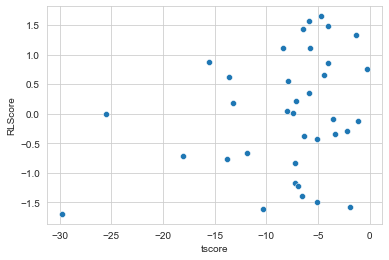

In [12]:
sns.scatterplot(data=metrics, x='tscore', y='RLScore')

# load gradients

In [52]:
dfg = pd.read_csv('gradients.csv')  # df gradient values
dfg

,subject,epoch,region,label,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,VisCort,0.480404,-0.263703,2.180387,0.402468,2.283943
1,1,baseline,7Networks_LH_Vis_2,VisCort,0.573926,1.403178,1.020010,-0.193533,1.837437
2,1,baseline,7Networks_LH_Vis_3,VisCort,0.291590,0.662147,1.628197,-0.588381,1.876348
3,1,baseline,7Networks_LH_Vis_4,VisCort,2.352881,2.066208,0.201950,0.252048,3.147948
4,1,baseline,7Networks_LH_Vis_5,VisCort,0.388140,0.618736,1.054415,-0.233904,1.303837
...,...,...,...,...,...,...,...,...,...
118555,46,late,Vermis IX,VermisSubC,-0.427469,-0.480867,2.758838,3.350099,4.387290
118556,46,late,Right IX,RightSubC,-0.001993,-0.173274,2.976064,3.083490,4.288927
118557,46,late,Left X,LeftSubC,0.033317,-0.974091,3.004128,2.663435,4.131420
118558,46,late,Vermis X,VermisSubC,1.201635,-0.963183,2.926164,2.514043,4.153853


removing cerebellum regions

In [53]:
dfg = dfg[dfg['label'] != 'VermisSubC']

In [54]:
match = pd.read_csv('/Users/qasem/PycharmProjects/gradients-rl-task/data/participants.tsv', delimiter='\t')
dff = pd.merge(dfg, match[match.exclude==0], left_on='subject', right_on='participant_id', how='inner') # df features
dff = dff.rename(columns={'dicom_dir': 'Subject'})
dff = dff.set_index(['subject', 'Subject', 'epoch', 'region', 'label'])[['ecc']].unstack('epoch')   # make epochs differentiable
dff = dff.droplevel(level=0, axis=1)

In [55]:
dff['b2e'] = dff['early'] - dff['baseline']
dff['e2l'] = dff['late'] - dff['early']
dff = dff.reorder_levels([2, 3, 0, 1])
dff.head()

,,,epoch,baseline,early,late,b2e,e2l
region,label,subject,Subject,,,,,
7Networks_LH_Cont_Cing_1,ContCort,1,AB1,1.711138,2.394232,2.146025,0.683094,-0.248207
7Networks_LH_Cont_Cing_2,ContCort,1,AB1,3.102014,2.898759,1.677897,-0.203255,-1.220862
7Networks_LH_Cont_Cing_3,ContCort,1,AB1,3.292430,2.884357,2.163636,-0.408073,-0.720721
7Networks_LH_Cont_Cing_4,ContCort,1,AB1,1.042868,2.118850,1.245695,1.075983,-0.873155
7Networks_LH_Cont_Cing_5,ContCort,1,AB1,1.922322,2.037887,2.047199,0.115565,0.009313


In [56]:
df = dff.reset_index(level=[0,1,2]).join(metrics)  # metrics and features merged
df = df.set_index(['region', 'label', 'subject', df.index])

In [57]:
df.head()

,,,,baseline,early,late,b2e,e2l,tscore,RLScore
region,label,subject,Subject,,,,,,,
7Networks_LH_Cont_Cing_1,ContCort,1,AB1,1.711138,2.394232,2.146025,0.683094,-0.248207,-7.195868,-1.179789
7Networks_LH_Cont_Cing_2,ContCort,1,AB1,3.102014,2.898759,1.677897,-0.203255,-1.220862,-7.195868,-1.179789
7Networks_LH_Cont_Cing_3,ContCort,1,AB1,3.292430,2.884357,2.163636,-0.408073,-0.720721,-7.195868,-1.179789
7Networks_LH_Cont_Cing_4,ContCort,1,AB1,1.042868,2.118850,1.245695,1.075983,-0.873155,-7.195868,-1.179789
7Networks_LH_Cont_Cing_5,ContCort,1,AB1,1.922322,2.037887,2.047199,0.115565,0.009313,-7.195868,-1.179789


# cross correlation

In [58]:
from scipy.stats import pearsonr

In [59]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

<AxesSubplot:xlabel='b2e', ylabel='tscore'>

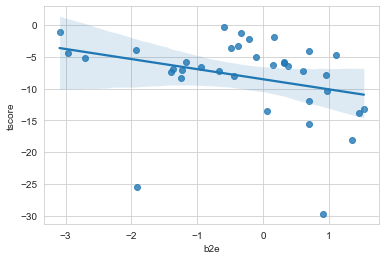

In [60]:
sns.regplot(data=df.loc['7Networks_LH_Default_PFC_9'], x='b2e', y='tscore')

## average features within networks

In [61]:
dfn = df.groupby(level=[1,2,3]).mean()  # df networks mean

In [62]:
# dfn.xs('JS1', level=2)
dfn.dropna(inplace=True)

In [63]:
dfn.head()

baseline     early      late       b2e       e2l  \
label    subject Subject                                                     
ContCort 1       AB1      2.794769  2.471948  3.070262 -0.322821  0.598313   
         2       AG1      2.742227  2.838582  2.794746  0.096355 -0.043836   
         3       AH1      2.761401  2.595296  2.545638 -0.166105 -0.049658   
         4       AM1      2.365607  2.726335  2.795614  0.360728  0.069279   
         6       AP1      2.554872  3.098034  2.745018  0.543163 -0.353016   

                             tscore   RLScore  
label    subject Subject                       
ContCort 1       AB1      -7.195868 -1.179789  
         2       AG1      -5.822339  1.104018  
         3       AH1      -2.248812 -0.302101  
         4       AM1      -6.593196 -1.400917  
         6       AP1     -15.539946  0.868475

<AxesSubplot:xlabel='b2e', ylabel='RLScore'>

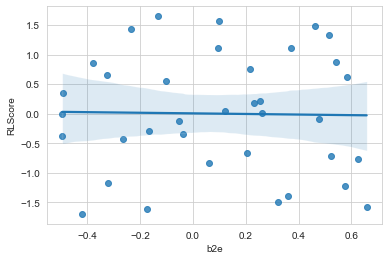

In [64]:
sns.regplot(data=dfn.loc['ContCort'], x='b2e', y='RLScore')

In [65]:
dfc = []    # cross correlation
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['tscore', 'RLScore']
for x in X:
    for y in Y:
        r = dfn.groupby(level=0).apply(r_value, x=x, y=y)    # grouped by region
        p = dfn.groupby(level=0).apply(p_value, x=x, y=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfc.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
dfc = pd.concat(dfc, axis=1, keys=[x+'__'+y for x in X for y in Y])
dfc.head()

baseline__tscore                     baseline__RLScore            \
                            r         p      pcor                 r         p   
label                                                                           
ContCort            -0.069160  0.688571  0.845354          0.114390  0.506495   
DefaultCort          0.109201  0.526091  0.845354         -0.004819  0.977747   
DorsAttnCort         0.271721  0.108909  0.351633          0.378415  0.022862   
LeftSubC            -0.080383  0.641191  0.845354         -0.111769  0.516349   
LimbicCort          -0.125613  0.465405  0.845354          0.084573  0.623844   

                       early__tscore                     early__RLScore  ...  \
                  pcor             r         p      pcor              r  ...   
label                                                                    ...   
ContCort      0.861997      0.071512  0.678538  0.847906       0.105830  ...   
DefaultCort   0.977747     -0.081285  0.637443  0.847906      -0.120506  ...   
DorsAttnCort  0.205760     -0.033126  0.847906  0.847906      -0.153654  ...   
LeftSubC      0.861997     -0.035483  0.837221  0.847906      -0.161179  ...   
LimbicCort    0.861997     -0.204043  0.232612  0.838879      -0.077475  ...   

             b2e__tscore b2e__RLScore                     e2l__tscore  \
                    pcor            r         p      pcor           r   
label                                                                   
ContCort        0.915749    -0.018349  0.915410  0.915410   -0.123475   
DefaultCort     0.915749    -0.093632  0.587020  0.880530   -0.051959   
DorsAttnCort    0.915749    -0.376710  0.023535  0.211812   -0.132093   
LeftSubC        0.930819    -0.022698  0.895461  0.915410   -0.037139   
LimbicCort      0.915749    -0.114917  0.504528  0.880530    0.071275   

                                 e2l__RLScore                      
                     p      pcor            r         p      pcor  
label                                                              
ContCort      0.473092  0.863399    -0.094665  0.582881  0.790029  
DefaultCort   0.763449  0.863399     0.106787  0.535334  0.790029  
DorsAttnCort  0.442511  0.863399     0.086858  0.614467  0.790029  
LeftSubC      0.829735  0.863399     0.235024  0.167649  0.754422  
LimbicCort    0.679546  0.863399     0.003581  0.983462  0.983462  

[5 rows x 30 columns]

out of ten networks

In [66]:
p = dfc.xs('p', axis=1, level=1).iloc[:, [1, 3, 5, 7, 9]]
(p<.05).sum()

baseline__RLScore    1
early__RLScore       0
late__RLScore        0
b2e__RLScore         1
e2l__RLScore         1
dtype: int64

In [67]:
p = dfc.xs('p', axis=1, level=1).iloc[:, [0, 2, 4, 6, 8]]
(p<.05).sum()

baseline__tscore    0
early__tscore       1
late__tscore        0
b2e__tscore         1
e2l__tscore         0
dtype: int64

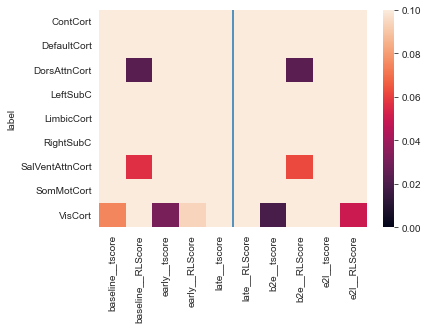

In [68]:
ax = sns.heatmap(dfc.xs('p', axis=1, level=1), vmin=0, vmax=.1)
ax.vlines(5, *ax.get_ylim())

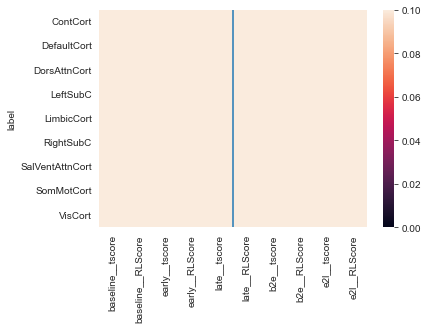

In [69]:
ax = sns.heatmap(dfc.xs('pcor', axis=1, level=1), vmin=0, vmax=.1)
ax.vlines(5, *ax.get_ylim())